In [14]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [15]:
DO1 = pd.read_csv('ICU Room 1 Door Open_R.csv')
DPO1 = pd.read_csv('ICU Room 1 Door Partially Open_R.csv')
NP1 = pd.read_csv('ICU Room 1 Negative Pressure_R.csv')
DO2 = pd.read_csv('ICU Room 2 Door Open_R.csv')
DPO2 = pd.read_csv('ICU Room 2 Door Partially Open_R.csv')

In [19]:
DO1.head()

,Time,S-01,S-02,S-03,S-04,S-05,S-06,S-07,S-08,S-09,...,S-15,S-16,S-18,S-19,Average,Variance,Zone 1,Zone 2,Zone 3,Zone 4
0,0,3969.20,62.30,62.80,40.80,62.80,84.80,108.500000,135.200000,75.200000,...,120.50,49.80,80.00,73.90,367.007692,8.196524e+06,2038.850000,40.80,65.260,81.050
1,1,4067.13,62.62,62.87,40.67,63.07,84.42,108.333333,135.213333,75.213333,...,121.05,49.97,80.15,73.81,374.486410,8.401374e+06,2087.731667,40.67,65.219,81.245
2,2,4165.06,62.94,62.94,40.54,63.34,84.04,108.166667,135.226667,75.226667,...,121.60,50.14,80.30,73.72,381.965128,8.606224e+06,2136.613333,40.54,65.178,81.440
3,3,4262.99,63.26,63.01,40.41,63.61,83.66,108.000000,135.240000,75.240000,...,122.15,50.31,80.45,73.63,389.443846,8.811074e+06,2185.495000,40.41,65.137,81.635
4,4,4360.92,63.58,63.08,40.28,63.88,83.28,107.833333,135.253333,75.253333,...,122.70,50.48,80.60,73.54,396.922564,9.015925e+06,2234.376667,40.28,65.096,81.830


In [17]:
DO1.insert(0, "Time", np.arange(0, 951, 1), True)
DO1['Zone 1'] = DO1[['S-01', 'S-07']].mean(axis=1)
DO1['Zone 2'] = DO1[['S-04']].mean(axis=1)
DO1['Zone 3'] = DO1[['S-02', 'S-03', 'S-05', 'S-06', 'S-08', 'S-09', 'S-10', 'S-12', 'S-13', 'S-14']].mean(axis=1)
DO1['Zone 4'] = DO1[['S-15', 'S-16', 'S-18', 'S-19']].mean(axis=1)

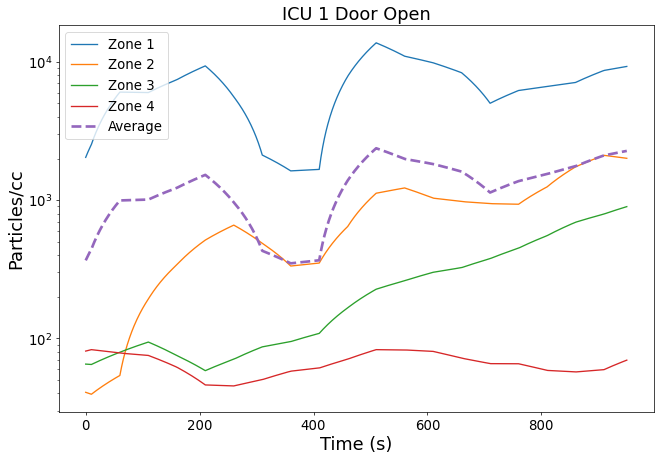

In [18]:
fig = plt.figure(1, figsize=(12,8), dpi=64)
plt.semilogy(DO1['Time'], DO1['Zone 1'])
plt.semilogy(DO1['Time'], DO1['Zone 2'])
plt.semilogy(DO1['Time'], DO1['Zone 3'])
plt.semilogy(DO1['Time'], DO1['Zone 4'])
plt.semilogy(DO1['Time'], DO1['Average'], linewidth = 3, linestyle = '--')
plt.title('ICU 1 Door Open').set_size(20)
plt.xlabel('Time (s)').set_size(20)
plt.ylabel('Particles/cc').set_size(20)
axes = plt.gca()
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Average'], prop = {'size':15})
#plt.axhline(y=0.005, color='black', linestyle='-')